In [1]:
import numpy as np
import math 
import cv2 
import matplotlib.pyplot as plt

In [2]:
def basic_global_thresholding(img,deltheshold):
    initial_mean = np.mean(img)
    while(True):
        pre_mean = initial_mean
        background = []
        foreground = []
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if(img[i][j] > initial_mean):
                    foreground.append(img[i][j])
                else:
                    background.append(img[i][j])
        mean_back = np.mean(background)
        mean_fore = np.mean(foreground)
        initial_mean = (mean_back + mean_fore)/2
        if(abs(initial_mean - pre_mean) <= deltheshold):
            break
    return math.ceil(initial_mean)

In [3]:
def otsu_thresholding(image):
    histogram, _ = np.histogram(image, bins=256, range=(0, 256))
    
    # Normalize histogram
    histogram = histogram / float(image.size)
    
    max_variance = 0
    threshold = 0

    for i in range(1, 256):
        w0 = np.sum(histogram[:i])
        w1 = np.sum(histogram[i:])
      
        if w0 == 0:
            mu0 = 0
        else:
            mu0 = np.sum(np.arange(i) * histogram[:i]) / w0

        if w1 == 0:
            mu1 = 0
        else:
            mu1 = np.sum(np.arange(i, 256) * histogram[i:]) / w1

        variance = w0 * w1 * (mu0 - mu1) ** 2

        if variance > max_variance:
            max_variance = variance
            threshold = i

    return threshold

In [4]:
def segmented_image(img,threshold):
    bin_image = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(threshold<img[i][j]):
                bin_image[i][j] = 1

    return bin_image                

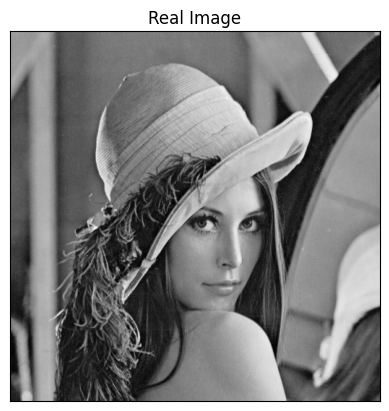

In [5]:
img = cv2.imread('CoverImages/lena.tiff',0)
plt.imshow(img, cmap='gray')
plt.title("Real Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
threshold_value = otsu_thresholding(img)
threshold_value

118

In [7]:
seg = segmented_image(img,threshold_value)

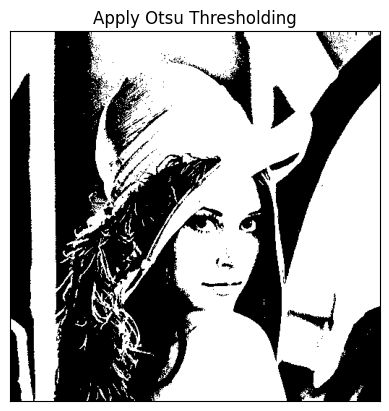

In [8]:
plt.imshow(seg, cmap='gray')
plt.title("Apply Otsu Thresholding")
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
threshold_value = basic_global_thresholding(img,0.01)
seg1 = segmented_image(img,threshold_value)

In [10]:
threshold_value

118

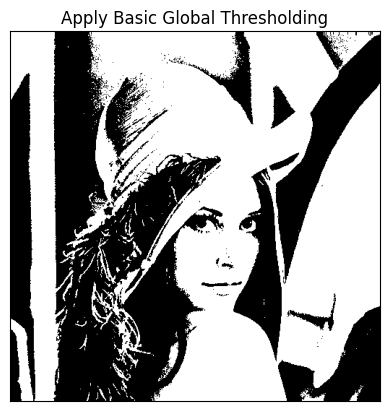

In [11]:
plt.imshow(seg1, cmap='gray')
plt.title("Apply Basic Global Thresholding")
plt.xticks([])
plt.yticks([])
plt.show()